In [1]:
import requests

# URL of the raw CSV file in your GitHub repo
url = 'https://raw.githubusercontent.com/thongthornpatch/w3-bird-survey-analysis/main/Dec_2024_eBird_W3_Data_Summary.csv'  # Change this URL
response = requests.get(url)

# Save the content as a CSV file
with open('/content/your-file.csv', 'wb') as file:
    file.write(response.content)

# Load the CSV file into a pandas DataFrame
import pandas as pd
data = pd.read_csv('/content/your-file.csv')

# Display the first few rows
data.head()


,Site Name,Country Code,Importance index for species above 1%,Combined Importance Index,Key species,Total waterbird,LC,NT,VU,EN,...,Haematopodidae,Ibidorhynchidae,Recurvirostridae,Burhinidae,Glareolidae,Charadriidae,Scolopacidae,Pedionomidae,Thinocoridae,Laridae
0,"Guang-guang Mangrove Park and Nursery, Mati",PH,0.0,2.161653,NaN,3059,2174,238,360,287,...,0,0,10,0,0,1616,1268,0,0,40
1,"Hinactacan Ponds, Jaro",PH,0.0,0.489543,NaN,287,257,7,9,14,...,0,0,34,0,0,68,59,0,0,19
2,Panabo Coastal Road,PH,0.0,1.120759,NaN,1630,448,1022,90,70,...,0,0,66,0,0,352,1119,0,0,58
3,"Dermaga Tambak, Desa Padengo",ID,0.0,0.014925,NaN,2,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,"Dusun Mekar Indah, Desa Dudewulo",ID,0.0,0.003721,NaN,5,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Columns in the dataset: ['Site Name', 'Country Code', 'Importance index for species above 1%', 'Combined Importance Index', 'Key species', 'Total waterbird', 'LC', 'NT', 'VU', 'EN', 'CR', 'Gaviidae', 'Podicipedidae', 'Pelecanidae', 'Phalacrocoracidae', 'Anhingidae', 'Ardeidae', 'Scopidae', 'Balaenicipitidae', 'Ciconiidae', 'Threskiornithidae', 'Phoenicopteridae', 'Anhimidae', 'Anatidae', 'Gruidae', 'Aramidae', 'Rallidae', 'Heliornithidae', 'Eurypygidae', 'Jacanidae', 'Rostratulidae', 'Dromadidae', 'Haematopodidae', 'Ibidorhynchidae', 'Recurvirostridae', 'Burhinidae', 'Glareolidae', 'Charadriidae', 'Scolopacidae', 'Pedionomidae', 'Thinocoridae', 'Laridae']


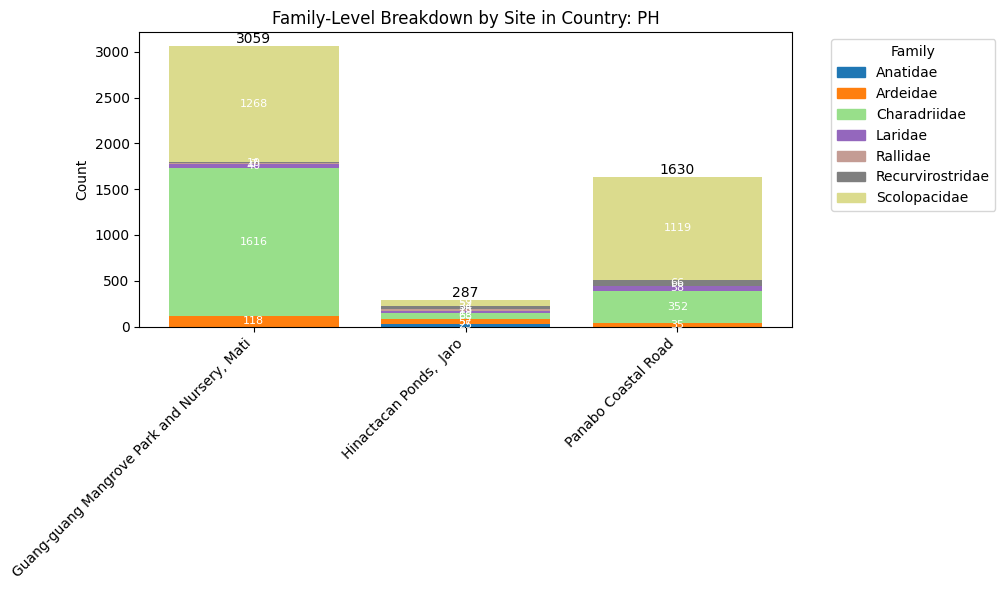

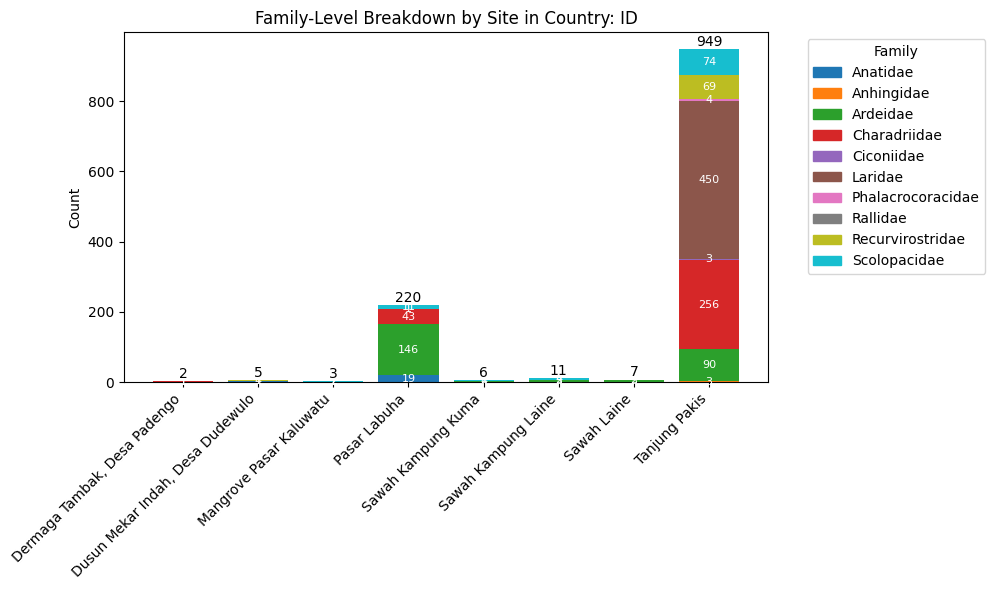

<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-e7ee8c59c004>:89: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from

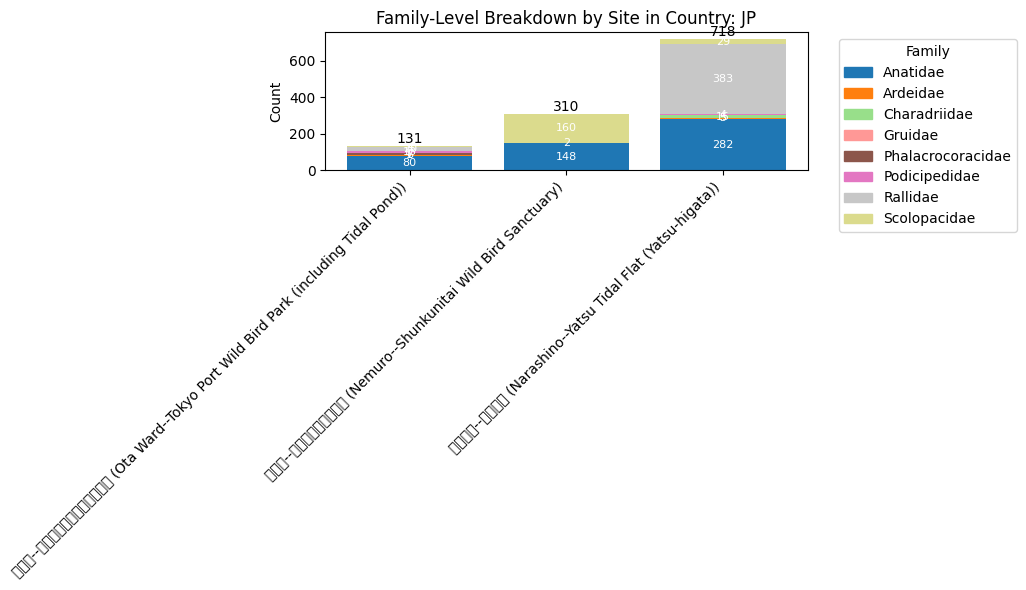

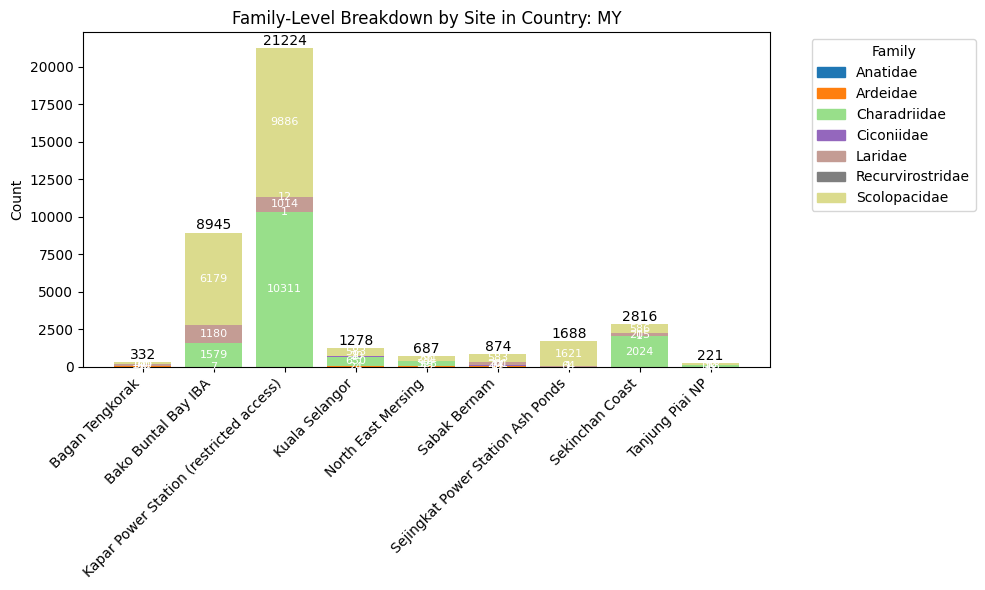

<ipython-input-11-e7ee8c59c004>:89: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


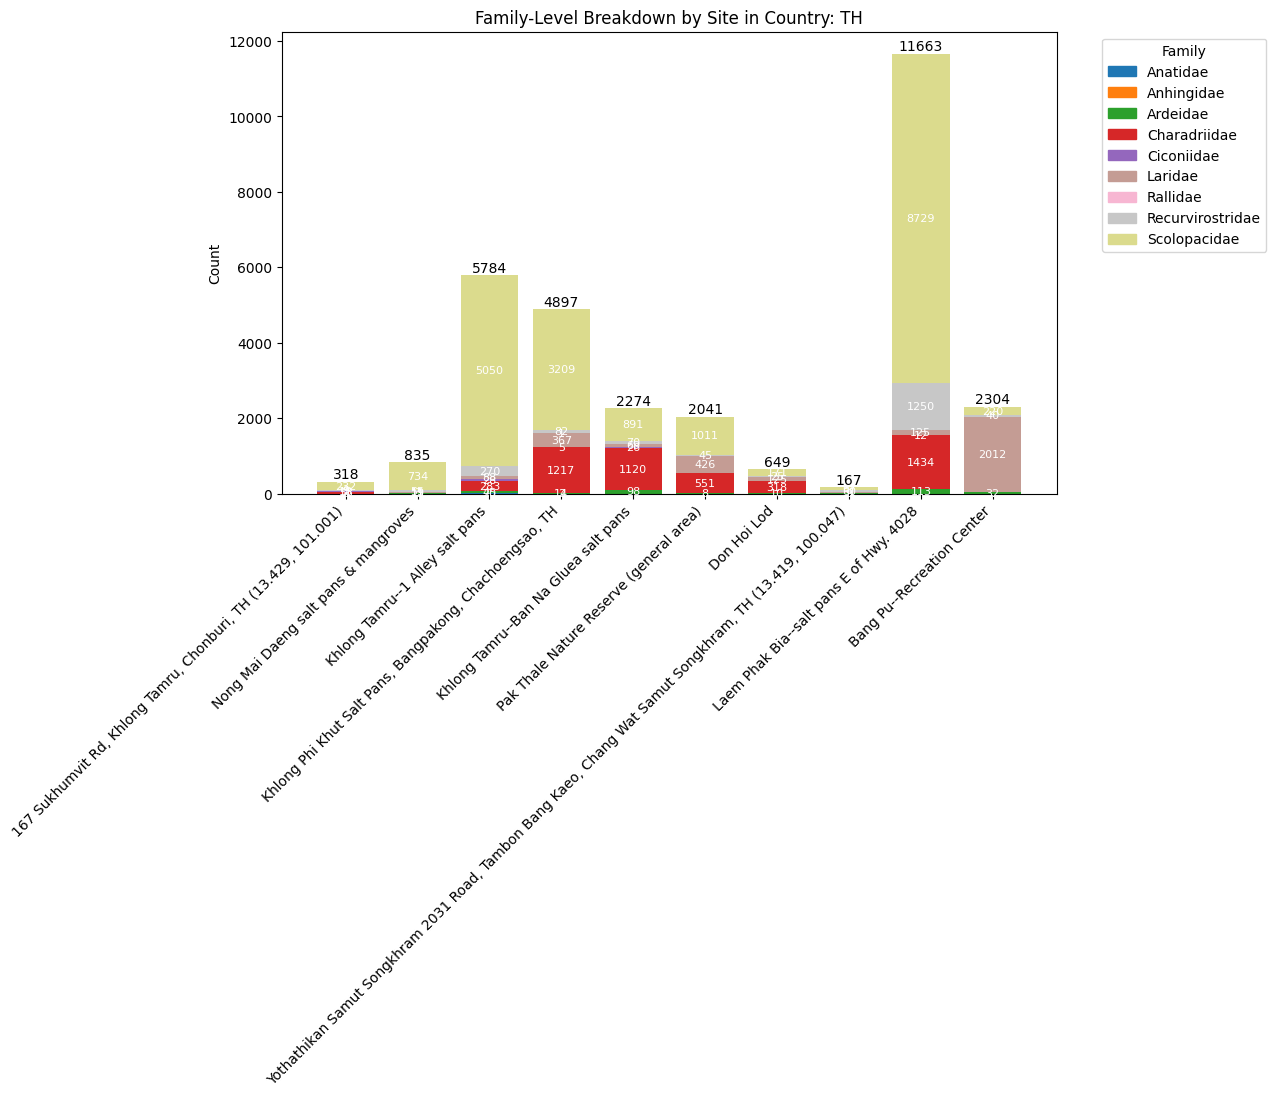

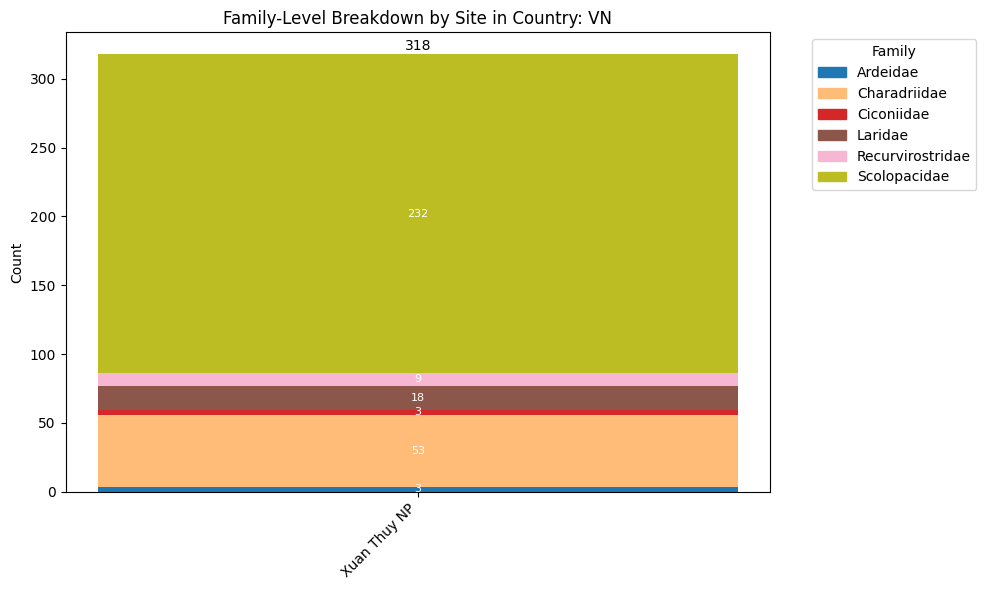

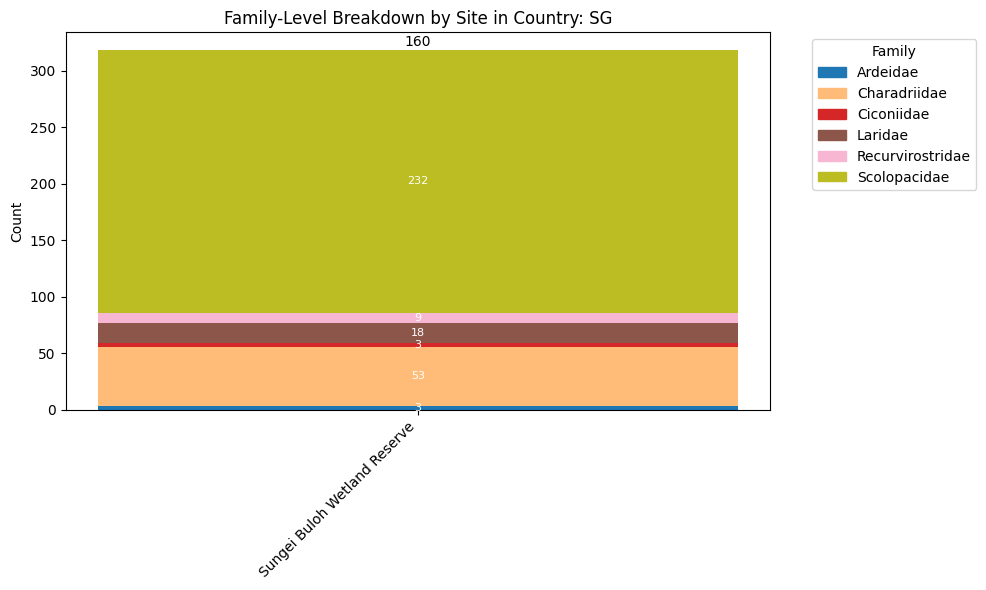

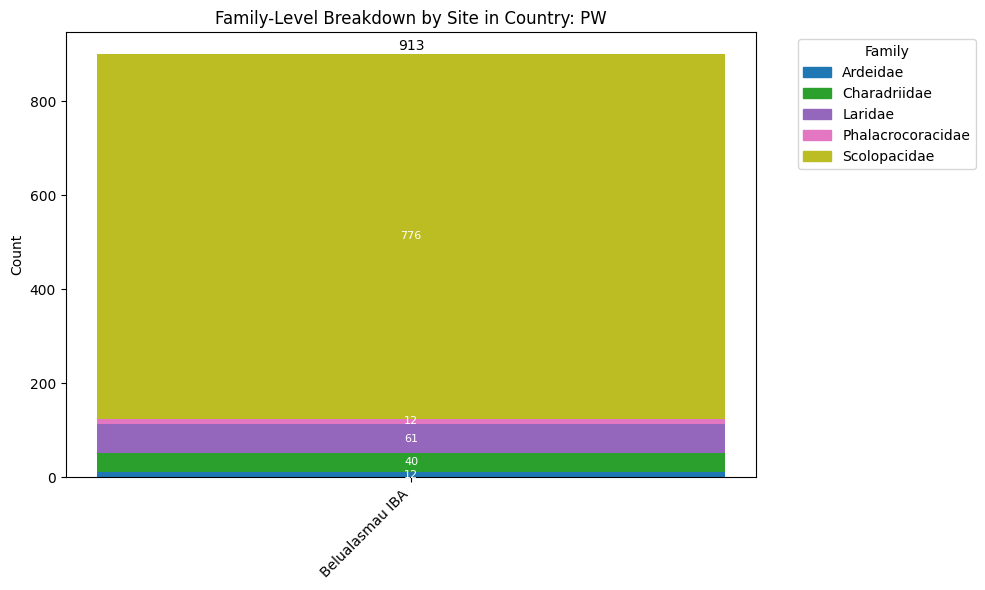

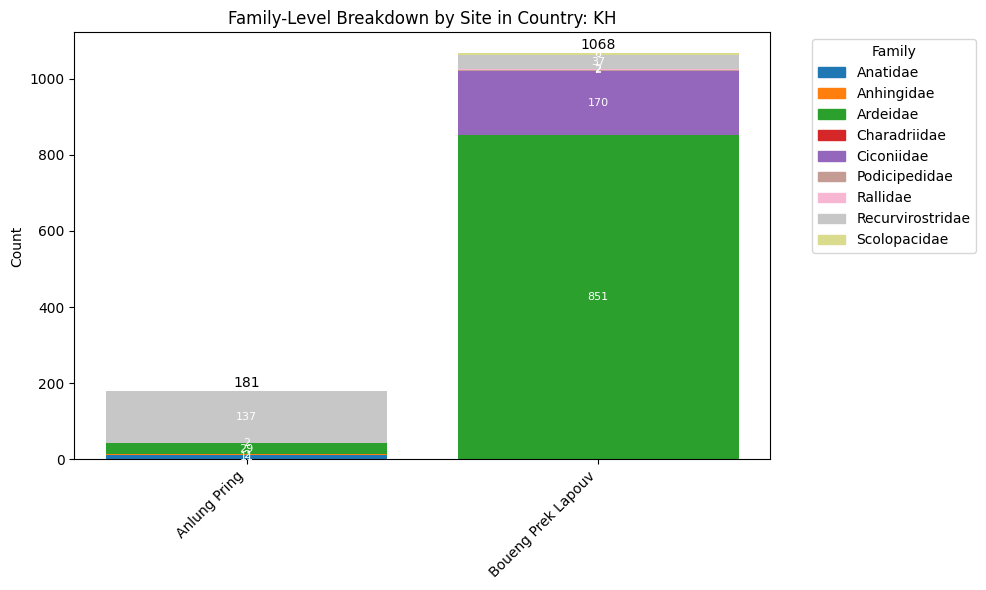

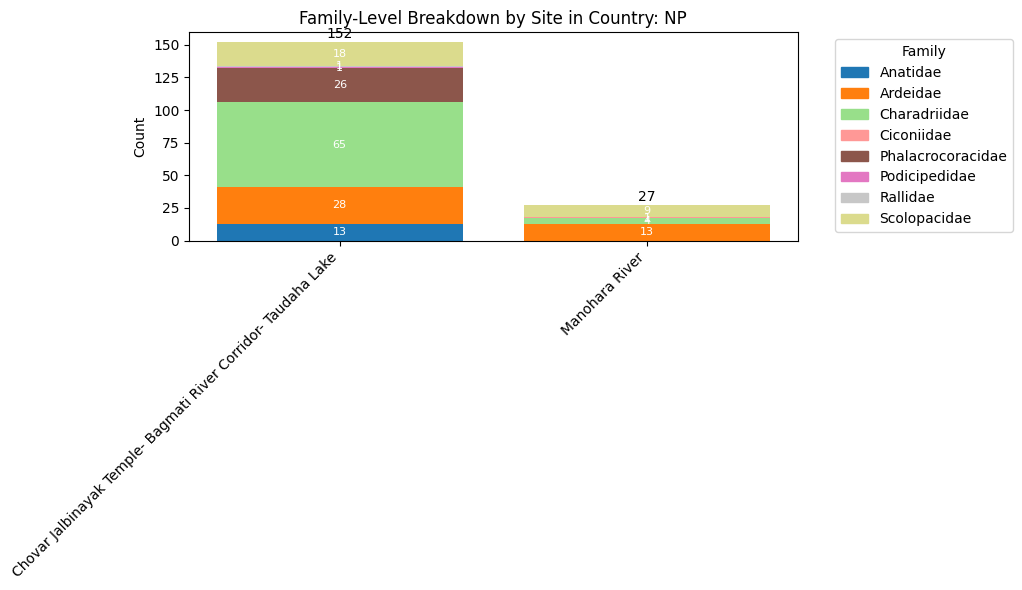

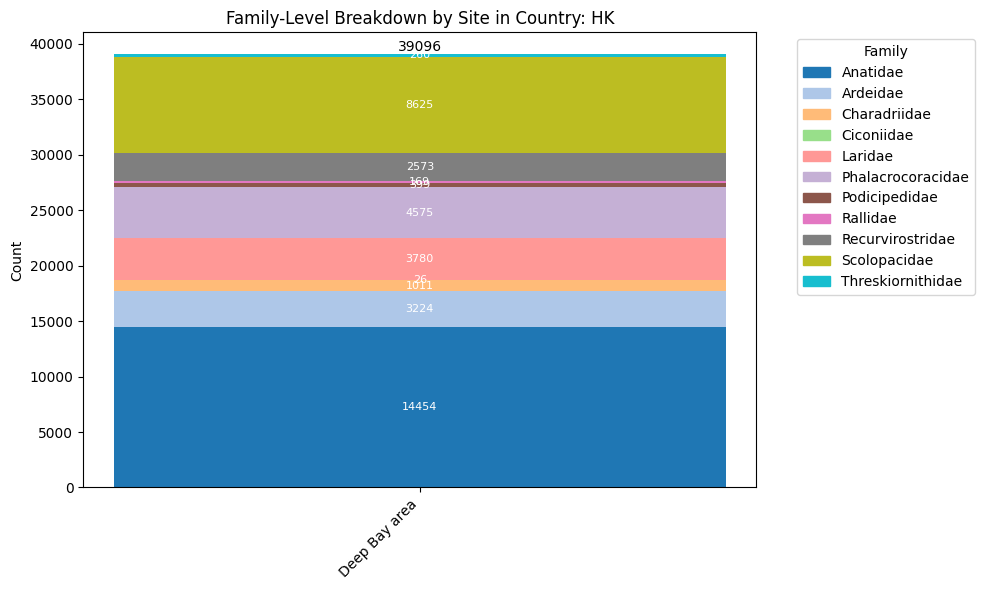

KeyboardInterrupt: 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load Data from GitHub
# ------------------------------
url = 'https://raw.githubusercontent.com/thongthornpatch/w3-bird-survey-analysis/main/Dec_2024_eBird_W3_Data_Summary.csv'
data = pd.read_csv(url)

# Print columns for reference
print("Columns in the dataset:", data.columns.tolist())

# ------------------------------
# 2. Define Column Groups
# ------------------------------
# Columns that are not bird families
non_family_columns = [
    'Site Name', 'Country Code',
    'Importance index for species above 1%', 'Combined Importance Index',
    'Key species', 'Total waterbird',
    'LC', 'NT', 'VU', 'EN', 'CR'
]
# The remaining columns are assumed to be bird families
family_columns = [col for col in data.columns if col not in non_family_columns]

# ------------------------------
# 3. Define IUCN Colors (official hex codes)
# ------------------------------
iucn_colors = {
    'LC': '#66cc33',   # Least Concern
    'NT': '#ffff66',   # Near Threatened
    'VU': '#ffcc66',   # Vulnerable
    'EN': '#ff6666',   # Endangered
    'CR': '#cc0000'    # Critically Endangered
}

# Get unique countries using 'Country Code'
countries = data['Country Code'].unique()

# ====================================================
# 4. Family-Level Breakdown: Stacked Bar per Country
# ====================================================
for country in countries:
    # Subset data for the current country
    df_country = data[data['Country Code'] == country]

    # Get the union of families (columns with count > 0) across all sites in this country
    families_in_country = set()
    for _, row in df_country.iterrows():
        for fam in family_columns:
            if row[fam] > 0:
                families_in_country.add(fam)
    families_in_country = sorted(list(families_in_country))

    # Assign colors to families using a colormap for consistent coloring
    cmap = plt.get_cmap("tab20")
    n_fams = len(families_in_country)
    family_colors = {fam: cmap(i / n_fams) for i, fam in enumerate(families_in_country)}

    # Create figure: one bar per site in this country
    fig, ax = plt.subplots(figsize=(10, 6))
    sites = df_country['Site Name'].tolist()
    x_positions = range(len(sites))

    for i, (_, row) in enumerate(df_country.iterrows()):
        bottom = 0
        # For each family in the country, add the segment only if the site has nonzero count
        for fam in families_in_country:
            count = row[fam] if row[fam] > 0 else 0
            if count > 0:
                ax.bar(i, count, bottom=bottom, color=family_colors[fam])
                # Annotate with the count inside the segment
                ax.text(i, bottom + count/2, str(int(count)),
                        ha='center', va='center', fontsize=8, color='white')
                bottom += count
        # Annotate total waterbirds at the top of the bar
        total = row['Total waterbird']
        ax.text(i, bottom + 1, f"{int(total)}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(sites, rotation=45, ha='right')
    ax.set_ylabel("Count")
    ax.set_title(f"Family-Level Breakdown by Site in Country: {country}")

    # Create legend for families
    handles = [plt.Rectangle((0, 0), 1, 1, color=family_colors[fam]) for fam in families_in_country]
    ax.legend(handles, families_in_country, title="Family", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# ====================================================
# 5. IUCN Status Breakdown: Stacked Bar per Country
# ====================================================
for country in countries:
    df_country = data[data['Country Code'] == country]

    fig, ax = plt.subplots(figsize=(10, 6))
    sites = df_country['Site Name'].tolist()
    x_positions = range(len(sites))

    for i, (_, row) in enumerate(df_country.iterrows()):
        bottom = 0
        # Total count from IUCN columns for percentage calculation
        total_status = row['LC'] + row['NT'] + row['VU'] + row['EN'] + row['CR']
        # Iterate over IUCN statuses in a fixed order
        for status in ['LC', 'NT', 'VU', 'EN', 'CR']:
            count = row[status]
            if count > 0:
                ax.bar(i, count, bottom=bottom, color=iucn_colors[status])
                perc = (count / total_status * 100) if total_status > 0 else 0
                ax.text(i, bottom + count/2, f"{perc:.1f}%",
                        ha='center', va='center', fontsize=8, color='white')
                bottom += count
        # Annotate total waterbirds at the top of the bar
        ax.text(i, bottom + 1, f"{int(row['Total waterbird'])}", ha='center', va='bottom', fontsize=10)

    ax.set_xticks(x_positions)
    ax.set_xticklabels(sites, rotation=45, ha='right')
    ax.set_ylabel("Count")
    ax.set_title(f"IUCN Status Breakdown by Site in Country: {country}")

    # Create legend for IUCN statuses
    handles = [plt.Rectangle((0, 0), 1, 1, color=iucn_colors[status]) for status in ['LC', 'NT', 'VU', 'EN', 'CR']]
    ax.legend(handles, ['LC', 'NT', 'VU', 'EN', 'CR'], title="IUCN Status", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
